In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cs770-assignment-2b/sample_submission_insurance.csv
/kaggle/input/cs770-assignment-2b/test_data_insurance.csv
/kaggle/input/cs770-assignment-2b/train_data_insurance.csv


* **NAME: Abu Tyeb Azad**
* **WSU ID: Q688C867**
* **Email: axazad1@shockers.wichita.edu**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
from scipy import stats

**Data Preprocessing & Analysis**

In [ ]:
train_df = pd.read_csv('/kaggle/input/cs770-assignment-2b/train_data_insurance.csv')
test_df = pd.read_csv('/kaggle/input/cs770-assignment-2b/test_data_insurance.csv')

In [ ]:
train_df.head()

,Index,age,sex,bmi,children,smoker,region,charges
0,1,46,female,19.95,2,no,northwest,9193.83850
1,2,47,female,24.32,0,no,northeast,8534.67180
2,3,52,female,24.86,0,no,southeast,27117.99378
3,4,39,female,34.32,5,no,southeast,8596.82780
4,5,54,female,21.47,3,no,northwest,12475.35130


In [ ]:
test_df.head()

,Index,age,sex,bmi,children,smoker,region
0,1,45,female,25.175,2,no,northeast
1,2,36,female,30.020,0,no,northwest
2,3,64,female,26.885,0,yes,northwest
3,4,46,male,25.745,3,no,northwest
4,5,19,male,31.920,0,yes,northwest


In [ ]:
#Since the indices for rows are in the dataset, default dataframe indices are replaced with given indices
train_df.set_index('Index', inplace=True)

In [ ]:
#Now given indices are dataframes indices
#This will not be done for test data to maintain the same structure as sample submission file
train_df.head()

,age,sex,bmi,children,smoker,region,charges
Index,,,,,,,
1,46,female,19.95,2,no,northwest,9193.83850
2,47,female,24.32,0,no,northeast,8534.67180
3,52,female,24.86,0,no,southeast,27117.99378
4,39,female,34.32,5,no,southeast,8596.82780
5,54,female,21.47,3,no,northwest,12475.35130


In [ ]:
train_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
test_df.dtypes

Index         int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [ ]:
#No null value exists in both feature and target columns of training data
training_null_counts = train_df.isnull().sum()
print(training_null_counts)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
#No null value exists in feature columns of test data
test_null_counts = test_df.isnull().sum()
print(test_null_counts)

Index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64


In [ ]:
#Non-categorical feature 'age' contains no negative or unusually large positive number in training data
print(train_df['age'].max())
print(train_df['age'].min())

64
18


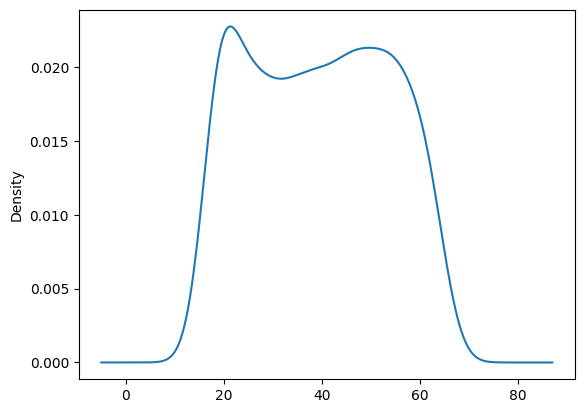

In [ ]:
# 'age' is NOT normally distributed in training data
train_df['age'].plot.kde()
plt.show()

In [ ]:
#Non-categorical feature 'age' contains no negative or unusually large positive number in test data
print(test_df['age'].max())
print(test_df['age'].min())

64
18


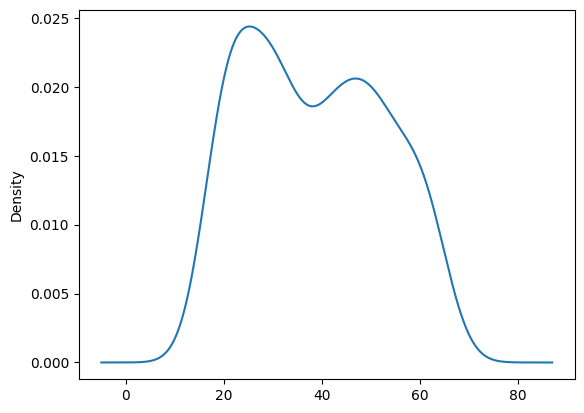

In [ ]:
# 'age' is NOT normally distributed in test data
test_df['age'].plot.kde()
plt.show()

In [ ]:
#Non-categorical feature 'bmi' contains no negative number in training data
print(train_df['bmi'].max())
print(train_df['bmi'].min())

53.13
15.96


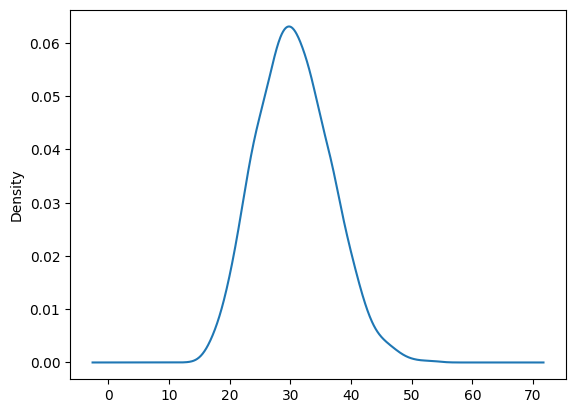

In [ ]:
#'bmi' is normally distributed in training data
train_df['bmi'].plot.kde()
plt.show()

In [ ]:
#Non-categorical feature 'bmi' contains no negative or unusually large positive number in test data
print(test_df['bmi'].max())
print(test_df['bmi'].min())

52.58
16.815


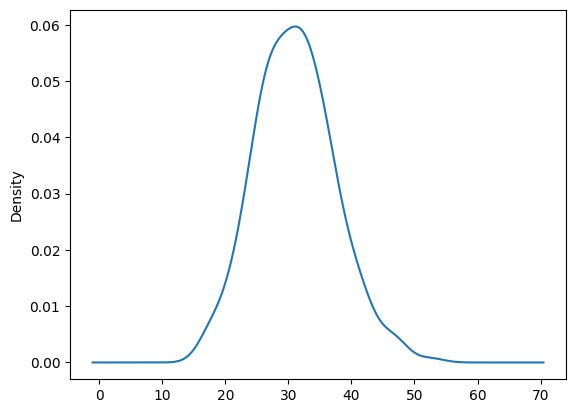

In [ ]:
#'bmi' is normally distributed in test data
test_df['bmi'].plot.kde()
plt.show()

In [ ]:
#Non-categorical feature 'children' contains no negative or unusually large positive number in training data
#But the feature has all together 6 ([0,5]) possible values in the dataset. So if we want, we can use it as a categorical feature
print(train_df['children'].max())
print(train_df['children'].min())

5
0


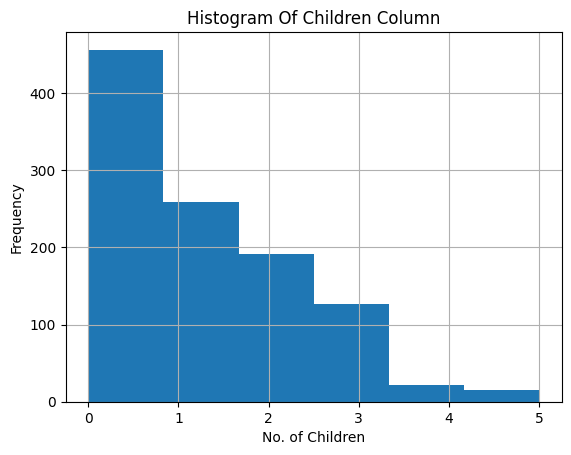

In [ ]:
#The data distribution is NOT normal (left skewed) in training data
train_df['children'].hist(bins=6)
plt.xlabel('No. of Children')
plt.ylabel('Frequency')
plt.title('Histogram Of Children Column')
plt.show()

In [ ]:
#Non-categorical feature 'children' contains no negative or unusually large positive number in test data
#But the features has all together 6 ([0,5]) possible values in the dataset. So if we want, we can use it as a categorical feature
print(test_df['children'].max())
print(test_df['children'].min())

5
0


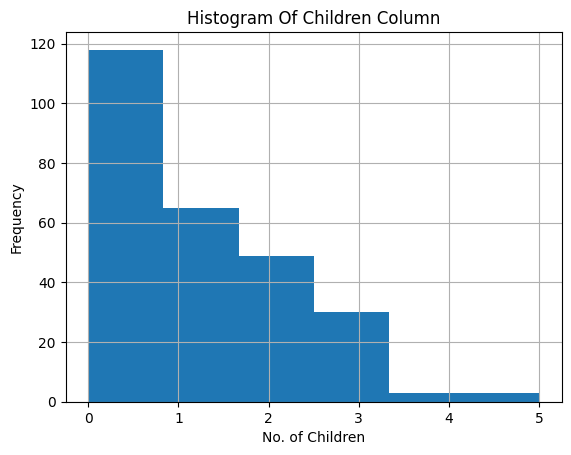

In [ ]:
#The data distribution is NOT normal (left skewed) in test data
test_df['children'].hist(bins=6)
plt.xlabel('No. of Children')
plt.ylabel('Frequency')
plt.title('Histogram Of Children Column')
plt.show()

In [ ]:
#Target 'charges' contains no negative or unusually large positive number in training data
print(train_df['charges'].max())
print(train_df['charges'].min())

62592.87309
1121.8739


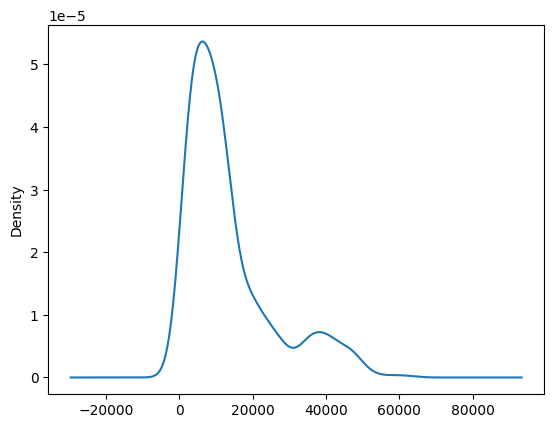

In [ ]:
#Data distribution of target variable 'charges' is NOT normal and NOT so many data points are over $20,000
train_df['charges'].plot.kde()
plt.show()

**Categorical Feature Encoding**

In [ ]:
#Possible values of each categorical feature in training data
#Since no. of possible values is 2, we can use binary encoding for 'sex' and 'smoker'
#For 'region' we will use label encoding
print(f"Sex: {train_df['sex'].unique()}")
print(f"Smoker: {train_df['smoker'].unique()}")
print(f"Region: {train_df['region'].unique()}")

Sex: ['female' 'male']
Smoker: ['no' 'yes']
Region: ['northwest' 'northeast' 'southeast' 'southwest']


In [ ]:
#Possible values of each categorical feature in test data
#Since no. of possible values is 2, we can use binary encoding for 'sex' and 'smoker'
#For 'region' we will use label encoding
print(f"Sex: {test_df['sex'].unique()}")
print(f"Smoker: {test_df['smoker'].unique()}")
print(f"Region: {test_df['region'].unique()}")

Sex: ['female' 'male']
Smoker: ['no' 'yes']
Region: ['northeast' 'northwest' 'southwest' 'southeast']


In [ ]:
#Binary Encoding 'sex' for training data
sex_mapping = {'male': 1, 'female': 0}
print(f"Possible values before  binary encoding feature 'sex': {train_df['sex'].unique()}")
train_df['sex'] = train_df['sex'].replace(sex_mapping)
print(f"Possible values after binary encoding feature 'sex': {train_df['sex'].unique()}")

Possible values before  binary encoding feature 'sex': ['female' 'male']
Possible values after binary encoding feature 'sex': [0 1]


In [ ]:
#Binary Encoding 'sex' for testing data
sex_mapping = {'male': 1, 'female': 0}
print(f"Possible values before  binary encoding feature 'sex': {test_df['sex'].unique()}")
test_df['sex'] = test_df['sex'].replace(sex_mapping)
print(f"Possible values after binary encoding feature 'sex': {test_df['sex'].unique()}")

Possible values before  binary encoding feature 'sex': ['female' 'male']
Possible values after binary encoding feature 'sex': [0 1]


In [ ]:
#Binary Encoding 'smoker' for training data
smoker_mapping = {'yes': 1, 'no': 0}
print(f"Possible values before  binary encoding feature 'smoker': {train_df['smoker'].unique()}")
train_df['smoker'] = train_df['smoker'].replace(smoker_mapping)
print(f"Possible values after binary encoding feature 'smoker': {train_df['smoker'].unique()}")

Possible values before  binary encoding feature 'smoker': ['no' 'yes']
Possible values after binary encoding feature 'smoker': [0 1]


In [ ]:
#Binary Encoding 'smoker' for testing data
smoker_mapping = {'yes': 1, 'no': 0}
print(f"Possible values before  binary encoding feature 'smoker': {test_df['smoker'].unique()}")
test_df['smoker'] = test_df['smoker'].replace(smoker_mapping)
print(f"Possible values after binary encoding feature 'smoker': {test_df['smoker'].unique()}")

Possible values before  binary encoding feature 'smoker': ['no' 'yes']
Possible values after binary encoding feature 'smoker': [0 1]


In [ ]:
#Label Encoding 'region' for training data
region_mapping = {'northeast': 0, 'northwest': 1, 'southwest': 2, 'southeast': 3}
print(f"Possible values before label encoding feature 'region': {train_df['region'].unique()}")
train_df['region'] = train_df['region'].replace(region_mapping)
print(f"Possible values after label encoding feature 'region': {train_df['region'].unique()}")

Possible values before label encoding feature 'region': ['northwest' 'northeast' 'southeast' 'southwest']
Possible values after label encoding feature 'region': [1 0 3 2]


In [ ]:
#Label Encoding 'region' for test data
region_mapping = {'northeast': 0, 'northwest': 1, 'southwest': 2, 'southeast': 3}
print(f"Possible values before label encoding feature 'region': {test_df['region'].unique()}")
test_df['region'] = test_df['region'].replace(region_mapping)
print(f"Possible values after label encoding feature 'region': {test_df['region'].unique()}")

Possible values before label encoding feature 'region': ['northeast' 'northwest' 'southwest' 'southeast']
Possible values after label encoding feature 'region': [0 1 2 3]


In [ ]:
# Training data after encoding categorical features
train_df.head()

,age,sex,bmi,children,smoker,region,charges
Index,,,,,,,
1,46,0,19.95,2,0,1,9193.83850
2,47,0,24.32,0,0,0,8534.67180
3,52,0,24.86,0,0,3,27117.99378
4,39,0,34.32,5,0,3,8596.82780
5,54,0,21.47,3,0,1,12475.35130


In [ ]:
# Test data after encoding categorical features
test_df.head()

,Index,age,sex,bmi,children,smoker,region
0,1,45,0,25.175,2,0,0
1,2,36,0,30.020,0,0,1
2,3,64,0,26.885,0,1,1
3,4,46,1,25.745,3,0,1
4,5,19,1,31.920,0,1,1


In [ ]:
#Checking for null value after encoding training data
training_null_counts = train_df.isnull().sum()
print(training_null_counts)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
#Checking for null value after encoding test data
test_null_counts = test_df.isnull().sum()
print(test_null_counts)

Index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64


-->Checking correlation in feature space before scaling

In [ ]:
#There exists no strong correlation (>abs(0.5)) among features (obviously ignoring the diagonal entries)
correlation_matrix = train_df.iloc[:, 0:6].corr()

print(correlation_matrix)

               age       sex       bmi  children    smoker    region
age       1.000000 -0.008459  0.118274  0.060999 -0.052035  0.004291
sex      -0.008459  1.000000  0.015293  0.017080  0.070908 -0.013797
bmi       0.118274  0.015293  1.000000 -0.005040 -0.003450  0.254835
children  0.060999  0.017080 -0.005040  1.000000  0.013994 -0.018716
smoker   -0.052035  0.070908 -0.003450  0.013994  1.000000  0.023004
region    0.004291 -0.013797  0.254835 -0.018716  0.023004  1.000000


**Non-Categorical Feature Scaling**

**Since SVM models are sensitive to data distribution and range of features, scaling the features properly according to their data distribution type is ,in general, effective. If a feature is distributed normally, 'StandardScaler' will be used. If the distribution of a specific feature is not normal, 'MinMaxScaler' will be used.**

In [ ]:
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

-->Scaling BMI

3.7363421711116276
-2.4170598053385657


<Axes: ylabel='Density'>

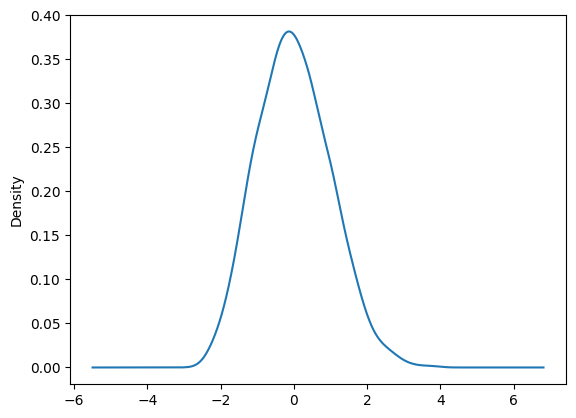

In [ ]:
#Training data
#Since 'bmi' is normally distributed (graphed in 'Data Preprocessing & Analysis'), 'StandardScaler' is applied to it

# Reshaped the converted (n,) numpy array of column 'bmi' to a size of (n,1) and applied 'fit_transform'
standardized_bmi = standard_scaler.fit_transform(np.reshape(train_df['bmi'].to_numpy(), (-1,1)))
train_df['bmi'] = pd.Series(standardized_bmi.squeeze())

print(train_df['bmi'].max())
print(train_df['bmi'].min())

# Shape of the data distribution remains 'normal'
train_df['bmi'].plot.kde()

In [ ]:
bmi_null_counts = train_df['bmi'].isnull().sum()
print(bmi_null_counts)

1


In [ ]:
# Since a null value is encountered, we will replace it with median bmi instead of mean bmi to -->
#  i. create a clean column
#  ii. avoid influence of large values
train_df['bmi'] = train_df['bmi'].fillna(train_df['bmi'].median())

In [ ]:
#Null value is replaced with median value
bmi_null_counts = train_df['bmi'].isnull().sum()
print(bmi_null_counts)

0


3.645291025374538
-2.275516660601818


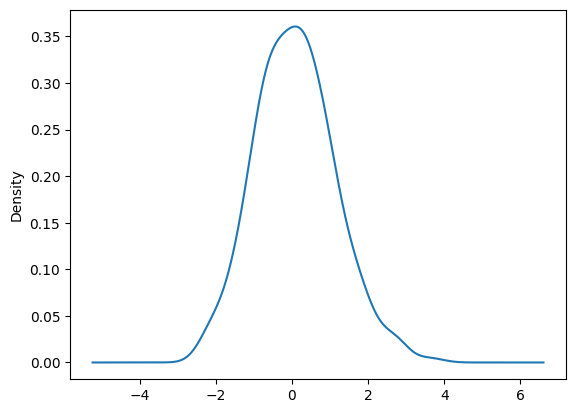

In [ ]:
#Test data
#Since 'bmi' is normally distributed (graphed in 'Data Preprocessing & Analysis'), 'StandardScaler' is applied to it

# Reshaped the converted (n,) numpy array of column 'bmi' to a size of (n,1) and applied 'transform' to avoid data leakage
standardized_bmi = standard_scaler.transform(np.reshape(test_df['bmi'].to_numpy(), (-1,1)))
test_df['bmi'] = pd.Series(standardized_bmi.squeeze())

print(test_df['bmi'].max())
print(test_df['bmi'].min())

# Shape of the data distribution remains 'normal'
test_df['bmi'].plot.kde()
plt.show()

In [ ]:
#No null value in test data
bmi_null_counts = test_df['bmi'].isnull().sum()
print(bmi_null_counts)

0


-->Scaling Age

1.0
0.0


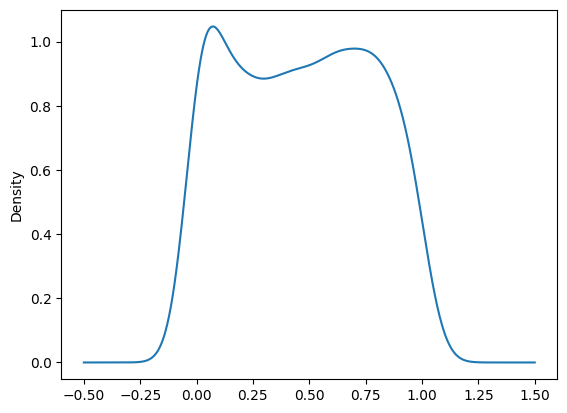

In [ ]:
#Training Data
#Since 'age' is NOT normally distributed (graphed in 'Data Preprocessing & Analysis'), 'MinMaxScaler' is applied to it

# Reshaped the converted (n,) numpy array of column 'age' to a size of (n,1) and applied 'fit_transform'
standardized_age = min_max_scaler.fit_transform(np.reshape(train_df['age'].to_numpy(), (-1,1)))
train_df['age'] = pd.Series(standardized_age.squeeze())

#The data range will be (0,1)
print(train_df['age'].max())
print(train_df['age'].min())

# Shape of the data distribution remains NOT 'normal'
train_df['age'].plot.kde()
plt.show()

In [ ]:
age_null_counts = train_df['age'].isnull().sum()
print(age_null_counts)

1


In [ ]:
#Since a null value is encountered, we will replace it with median age instead of mean age to -->
#  i. create a clean column
#  ii. avoid influence of large values
train_df['age'] = train_df['age'].fillna(train_df['age'].median())

In [ ]:
#Null value is replaced with median value
age_null_counts = train_df['age'].isnull().sum()
print(age_null_counts)

0


1.0
0.0


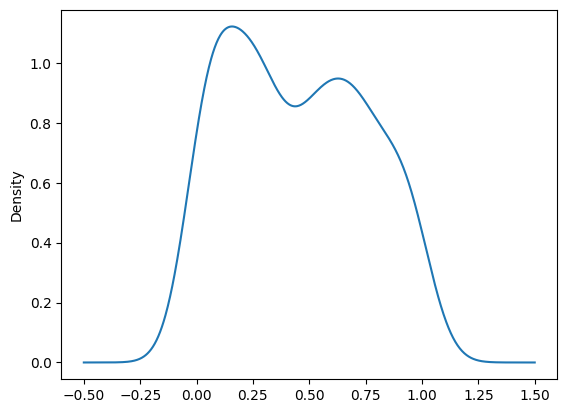

In [ ]:
#Test Data
#Since 'age' is NOT normally distributed (graphed in 'Data Preprocessing & Analysis'), 'MinMaxScaler' is applied to it

# Reshaped the converted (n,) numpy array of column 'age' to a size of (n,1) and applied 'transform' to avoid data leakage
standardized_age = min_max_scaler.transform(np.reshape(test_df['age'].to_numpy(), (-1,1)))
test_df['age'] = pd.Series(standardized_age.squeeze())

#The data range will be (0,1)
print(test_df['age'].max())
print(test_df['age'].min())

# Shape of the data distribution remains NOT 'normal'
test_df['age'].plot.kde()
plt.show()

In [ ]:
#No null value in test data
age_null_counts = test_df['age'].isnull().sum()
print(age_null_counts)

0


-->Scaling Children

In [ ]:
#Training Data
#Since 'children' is NOT normally distributed (graphed in 'Data Preprocessing & Analysis'), 'MinMaxScaler' is applied to it

# Reshaped the converted (n,) numpy array of column 'children' to a size of (n,1) and applied 'fit_transform'
standardized_children = min_max_scaler.fit_transform(np.reshape(train_df['children'].to_numpy(), (-1,1)))
train_df['children'] = pd.Series(standardized_children.squeeze())

#The data range will be (0,1)
print(train_df['children'].max())
print(train_df['children'].min())

1.0
0.0


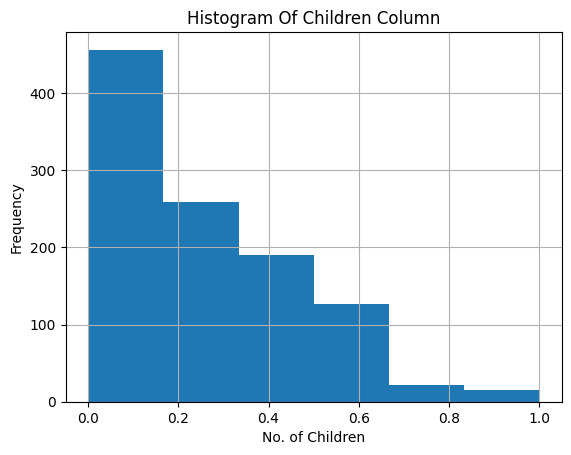

In [ ]:
#Shape of the data distribution remains NOT 'normal' (left skewed) in training data
train_df['children'].hist(bins=6)
plt.xlabel('No. of Children')
plt.ylabel('Frequency')
plt.title('Histogram Of Children Column')
plt.show()

In [ ]:
children_null_counts = train_df['children'].isnull().sum()
print(children_null_counts)

1


In [ ]:
#Since a null value is encountered, we will replace it with median children instead of mean children to -
#  i. create a clean column
#  ii. avoid influence of large values
train_df['children'] = train_df['children'].fillna(train_df['children'].median())

In [ ]:
#Null value is replaced with median value
children_null_counts = train_df['children'].isnull().sum()
print(children_null_counts)

0


In [ ]:
#Test Data
#Since 'children' is NOT normally distributed (graphed in 'Data Preprocessing & Analysis'), 'MinMaxScaler' is applied to it

# Reshaped the converted (n,) numpy array of column 'children' to a size of (n,1) and applied 'transform' to avoid data leakage
standardized_children = min_max_scaler.transform(np.reshape(test_df['children'].to_numpy(), (-1,1)))
test_df['children'] = pd.Series(standardized_children.squeeze())

#The data range will be (0,1)
print(test_df['children'].max())
print(test_df['children'].min())

1.0
0.0


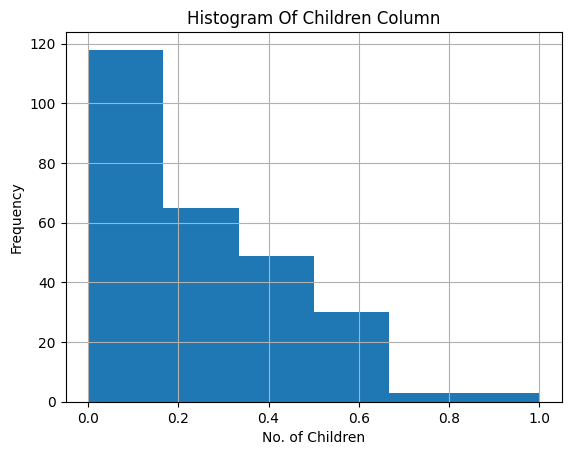

In [ ]:
#Shape of the data distribution remains NOT 'normal' (left skewed) in test data
test_df['children'].hist(bins=6)
plt.xlabel('No. of Children')
plt.ylabel('Frequency')
plt.title('Histogram Of Children Column')
plt.show()

In [ ]:
#No null value in test data
children_null_counts = test_df['children'].isnull().sum()
print(children_null_counts)

0


In [ ]:
# Training data after scaling non-categorical features
# Negative value for 'bmi' is ok since it's z-score, not actual value
train_df.head()

,age,sex,bmi,children,smoker,region,charges
Index,,,,,,,
1,0.630435,0,-1.033082,0.0,0,1,9193.83850
2,0.739130,0,-0.943687,0.0,0,0,8534.67180
3,0.456522,0,0.622393,1.0,0,3,27117.99378
4,0.782609,0,-1.504893,0.6,0,3,8596.82780
5,0.978261,0,1.806058,0.0,0,1,12475.35130


In [ ]:
# Test data after scaling non-categorical features
# Negative value for 'bmi' is ok since it's z-score, not actual value
test_df.head()

,Index,age,sex,bmi,children,smoker,region
0,1,0.586957,0,-0.891539,0.4,0,0
1,2,0.391304,0,-0.089461,0.0,0,1
2,3,1.000000,0,-0.608453,0.0,1,1
3,4,0.608696,1,-0.797177,0.6,0,1
4,5,0.021739,1,0.225079,0.0,1,1


--> Checking correaltion in feature space after scaling

In [ ]:
#Still There exists no strong correlation (>abs(0.5)) among features (obviously ignoring the diagonal entries)
correlation_matrix = train_df.iloc[:, 0:6].corr()

print(correlation_matrix)

               age       sex       bmi  children    smoker    region
age       1.000000 -0.005723  0.119235  0.060698 -0.008730 -0.016538
sex      -0.005723  1.000000  0.012098 -0.014441  0.070908 -0.013797
bmi       0.119235  0.012098  1.000000 -0.003835  0.015298  0.040494
children  0.060698 -0.014441 -0.003835  1.000000 -0.071251 -0.068722
smoker   -0.008730  0.070908  0.015298 -0.071251  1.000000  0.023004
region   -0.016538 -0.013797  0.040494 -0.068722  0.023004  1.000000


--> Checking correlation in feature and target space

In [ ]:
#Seems like there exists a strong positive correlation between feature 'smoker' and target variable 'charges' (0.78)
correlation_matrix = train_df.iloc[:, 0:7].corr()

#Last column is extracted (feature and label correlation)
#Check column (ignore the last entry of that column)
print(correlation_matrix['charges'])

age        -0.002115
sex         0.056802
bmi        -0.014666
children   -0.050633
smoker      0.780063
region      0.039569
charges     1.000000
Name: charges, dtype: float64


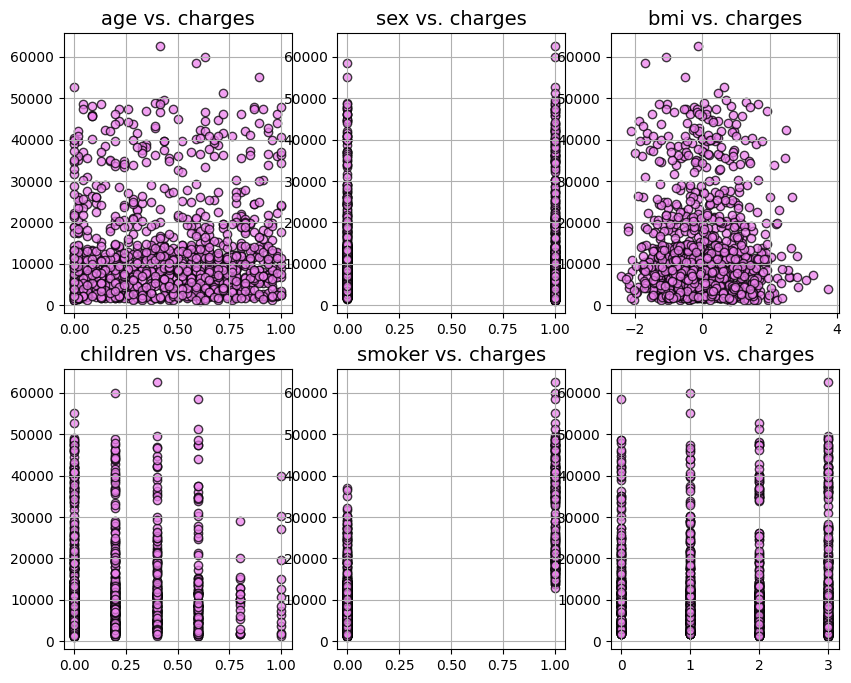

In [ ]:
fig,ax = plt.subplots(2,3,figsize=(10,8))
ax = ax.ravel()
for i in range(6):
    ax[i].scatter(train_df[train_df.columns[i]],train_df['charges'],edgecolor='k',color='violet',alpha=0.75)
    ax[i].set_title(f"{train_df.columns[i]} vs. charges",fontsize=14)
    ax[i].grid(True)
plt.show()

**Since there exists a positive correlation of ~0.7 between smoking behaviors and insurance charges, value of feature 'smoker' should have a larger effect on target variable 'charges'.**

**Training**

In [ ]:
#1070 data points exist in the dataset with 7 columns (6 feature [3 categorical, 3 non-categorical], 1 target [non-categorical and continuous])
print(train_df.columns)
print(train_df.shape)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
(1070, 7)


In [ ]:
train_df.head()

,age,sex,bmi,children,smoker,region,charges
Index,,,,,,,
1,0.630435,0,-1.033082,0.0,0,1,9193.83850
2,0.739130,0,-0.943687,0.0,0,0,8534.67180
3,0.456522,0,0.622393,1.0,0,3,27117.99378
4,0.782609,0,-1.504893,0.6,0,3,8596.82780
5,0.978261,0,1.806058,0.0,0,1,12475.35130


In [ ]:
#Placing features and targets in two separate dataframes
train_data_x = train_df.iloc[:, 0:6]
train_data_y = train_df.iloc[:, 6]

In [ ]:
print(train_data_x.shape)
print(train_data_y.shape)

(1070, 6)
(1070,)


In [ ]:
# train_data_x contains all 6 features
train_data_x.head()

,age,sex,bmi,children,smoker,region
Index,,,,,,
1,0.630435,0,-1.033082,0.0,0,1
2,0.739130,0,-0.943687,0.0,0,0
3,0.456522,0,0.622393,1.0,0,3
4,0.782609,0,-1.504893,0.6,0,3
5,0.978261,0,1.806058,0.0,0,1


In [ ]:
# train_data_y contains target variable 'charges'
train_data_y.head()

Index
1     9193.83850
2     8534.67180
3    27117.99378
4     8596.82780
5    12475.35130
Name: charges, dtype: float64

In [ ]:
#Data is split into train and validation data using a 80/20 split
#'random_state' is used to set a seed variable of 51 to ensure reproducibility
train_x, validation_x, train_y, validation_y = train_test_split(train_data_x, train_data_y, test_size=0.2, random_state=51)

In [ ]:
#80% of training data features (1070*0.8 = 856) are in train_x
#20% of training data features (1070*0.2 = 214) are in validation_x
print(train_x.shape)
print(validation_x.shape)

(856, 6)
(214, 6)


In [ ]:
#train_y and validation_y has same row counts as train_x and validation_x respectively
print(train_y.shape)
print(validation_y.shape)

(856,)
(214,)


--> Grid Search: **In general, it is encouraged to observe performance of ml algorithms based on more than 1 combination of hyperparameters. For this task we are using multiple values of 'C', and 'epsilon' hyperparameters for each type of kernel (linear, polynomial, radial).**

* **C: value of C is inversely proportional to strength of regularization. Larger values (ex. 1000) of C can increase possibility of overfitting hence high variance may occur. On the other hand, smaller values of C (ex. 1) will result in underfitting and high bias.**
* **epsilon: region around decision boundary where penalties are ignored. In general, value of epsilon should be small.**

In [ ]:
hyperparam_grid = {
    'C': [1, 4, 5, 10, 100, 1000],
    'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0],
}

**Linear Kernel**

In [ ]:
#Kernel type 'linear'
linear_svr = SVR(kernel='linear')

In [ ]:
#5-fold cross validation is used
linear_grid_search = GridSearchCV(estimator=linear_svr, param_grid=hyperparam_grid, scoring='neg_mean_squared_error', cv=5, verbose=3)

In [ ]:
# Training is taking place
linear_grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END .........C=1, epsilon=0.1;, score=-170173543.780 total time=   0.0s
[CV 2/5] END .........C=1, epsilon=0.1;, score=-145499238.637 total time=   0.0s
[CV 3/5] END .........C=1, epsilon=0.1;, score=-168014601.202 total time=   0.0s
[CV 4/5] END .........C=1, epsilon=0.1;, score=-172108162.155 total time=   0.0s
[CV 5/5] END .........C=1, epsilon=0.1;, score=-132783980.733 total time=   0.0s
[CV 1/5] END .........C=1, epsilon=0.2;, score=-170173543.780 total time=   0.0s
[CV 2/5] END .........C=1, epsilon=0.2;, score=-145499238.637 total time=   0.0s
[CV 3/5] END .........C=1, epsilon=0.2;, score=-168014601.202 total time=   0.0s
[CV 4/5] END .........C=1, epsilon=0.2;, score=-172108162.155 total time=   0.0s
[CV 5/5] END .........C=1, epsilon=0.2;, score=-132783980.733 total time=   0.0s
[CV 1/5] END .........C=1, epsilon=0.3;, score=-170173543.780 total time=   0.0s
[CV 2/5] END .........C=1, epsilon=0.3;, score=

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [1, 4, 5, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
#Best linear svr is selected
best_linear_svr = linear_grid_search.best_estimator_

In [ ]:
# best score is multiplied by -1 to get mean squared error since the metric is neg_mean_squared_error
best_score = -linear_grid_search.best_score_
best_hyperparams = linear_grid_search.best_params_

print(f'Best Score (Linear Kernel): {best_score}')
print(f'Hyperparamater Combination for Best SVR (Linear Kernel): {best_hyperparams}')

Best Score (Linear Kernel): 63686272.106741786
Hyperparamater Combination for Best SVR (Linear Kernel): {'C': 1000, 'epsilon': 2.0}


In [ ]:
#Model performance is observed on validation data
linear_val_preds = best_linear_svr.predict(validation_x)

# Calculate mean squared error
linear_val_mse = mean_squared_error(validation_y, linear_val_preds)

# Print mean squared error
print(f"Mean Squared Error (linear kernel): {linear_val_mse}")

Mean Squared Error (linear kernel): 59479855.181943186


**Polynomial Kernel**

In [ ]:
#Kernel type 'polynomial'
polynomial_svr = SVR(kernel='poly')

In [ ]:
#5-fold cross validation is used
polynomial_grid_search = GridSearchCV(estimator=polynomial_svr, param_grid=hyperparam_grid, scoring='neg_mean_squared_error', cv=5, verbose=3)

In [ ]:
# Training is taking place
polynomial_grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END .........C=1, epsilon=0.1;, score=-170232103.980 total time=   0.0s
[CV 2/5] END .........C=1, epsilon=0.1;, score=-145401673.582 total time=   0.0s
[CV 3/5] END .........C=1, epsilon=0.1;, score=-168198351.658 total time=   0.0s
[CV 4/5] END .........C=1, epsilon=0.1;, score=-172288107.084 total time=   0.0s
[CV 5/5] END .........C=1, epsilon=0.1;, score=-132957140.777 total time=   0.0s
[CV 1/5] END .........C=1, epsilon=0.2;, score=-170231682.856 total time=   0.0s
[CV 2/5] END .........C=1, epsilon=0.2;, score=-145401673.582 total time=   0.0s
[CV 3/5] END .........C=1, epsilon=0.2;, score=-168198351.658 total time=   0.0s
[CV 4/5] END .........C=1, epsilon=0.2;, score=-172288107.084 total time=   0.0s
[CV 5/5] END .........C=1, epsilon=0.2;, score=-132957140.777 total time=   0.0s
[CV 1/5] END .........C=1, epsilon=0.3;, score=-170231261.745 total time=   0.0s
[CV 2/5] END .........C=1, epsilon=0.3;, score=

GridSearchCV(cv=5, estimator=SVR(kernel='poly'),
             param_grid={'C': [1, 4, 5, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
#Best polynomial svr is selected
best_polynomial_svr = polynomial_grid_search.best_estimator_

In [ ]:
# best score is multiplied by -1 to get mean squared error since the metric is neg_mean_squared_error
best_score = -polynomial_grid_search.best_score_
best_hyperparams = polynomial_grid_search.best_params_

print(f'Best Score (Polynomial Kernel): {best_score}')
print(f'Hyperparamater Combination for Best SVR (Polynomial Kernel): {best_hyperparams}')

Best Score (Polynomial Kernel): 81817650.1743536
Hyperparamater Combination for Best SVR (Polynomial Kernel): {'C': 1000, 'epsilon': 0.4}


In [ ]:
#Model performance is observed on validation data
polynomial_val_preds = best_polynomial_svr.predict(validation_x)

# Calculate mean squared error
polynomial_val_mse = mean_squared_error(validation_y, polynomial_val_preds)

# Print mean squared error
print(f"Mean Squared Error (polynomial kernel): {polynomial_val_mse}")

Mean Squared Error (polynomial kernel): 63227976.96118788


**Radial Kernel**

In [ ]:
#Kernel type 'radial'
radial_svr = SVR(kernel='rbf')

In [ ]:
#5-fold cross validation is used
radial_grid_search = GridSearchCV(estimator=radial_svr, param_grid=hyperparam_grid, scoring='neg_mean_squared_error', cv=5, verbose=3)

In [ ]:
# Training is taking place
radial_grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END .........C=1, epsilon=0.1;, score=-171077056.562 total time=   0.0s
[CV 2/5] END .........C=1, epsilon=0.1;, score=-146442858.633 total time=   0.0s
[CV 3/5] END .........C=1, epsilon=0.1;, score=-169458211.106 total time=   0.0s
[CV 4/5] END .........C=1, epsilon=0.1;, score=-172991266.013 total time=   0.0s
[CV 5/5] END .........C=1, epsilon=0.1;, score=-133337986.312 total time=   0.0s
[CV 1/5] END .........C=1, epsilon=0.2;, score=-171077056.562 total time=   0.0s
[CV 2/5] END .........C=1, epsilon=0.2;, score=-146442858.633 total time=   0.0s
[CV 3/5] END .........C=1, epsilon=0.2;, score=-169458211.106 total time=   0.0s
[CV 4/5] END .........C=1, epsilon=0.2;, score=-172991266.013 total time=   0.0s
[CV 5/5] END .........C=1, epsilon=0.2;, score=-133337986.312 total time=   0.0s
[CV 1/5] END .........C=1, epsilon=0.3;, score=-171077056.562 total time=   0.0s
[CV 2/5] END .........C=1, epsilon=0.3;, score=

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 4, 5, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
#Best radial svr is selected
best_radial_svr = radial_grid_search.best_estimator_

In [ ]:
# best score is multiplied by -1 to get mean squared error since the metric is neg_mean_squared_error
best_score = -radial_grid_search.best_score_
best_hyperparams = radial_grid_search.best_params_

print(f'Best Score (Radial Kernel): {best_score}')
print(f'Hyperparamater Combination for Best SVR (Radial Kernel): {best_hyperparams}')

Best Score (Radial Kernel): 87338916.85261233
Hyperparamater Combination for Best SVR (Radial Kernel): {'C': 1000, 'epsilon': 2.0}


In [ ]:
#Model performance is observed on validation data
radial_val_preds = best_radial_svr.predict(validation_x)

# Calculate mean squared error
radial_val_mse = mean_squared_error(validation_y, radial_val_preds)

# Print mean squared error
print(f"Mean Squared Error (radial kernel): {polynomial_val_mse}")

Mean Squared Error (radial kernel): 63227976.96118788


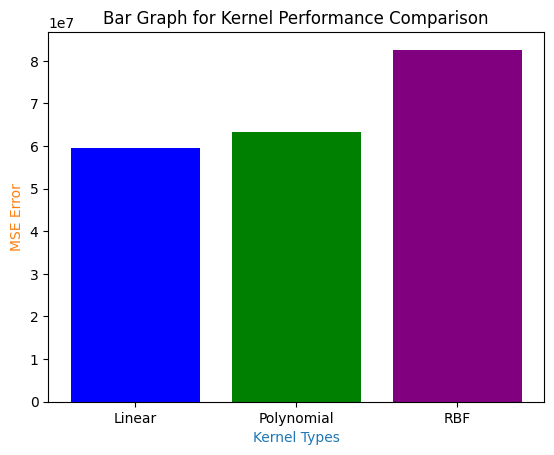

In [ ]:
kernel_types = ['Linear', 'Polynomial', 'RBF']
errors = [linear_val_mse, polynomial_val_mse, radial_val_mse]

plt.bar(kernel_types, errors, color=['blue', 'green', 'purple'])

# Adding labels and title
plt.xlabel('Kernel Types', color='C0')
plt.ylabel('MSE Error', color='C1')
plt.title('Bar Graph for Kernel Performance Comparison')

# Display the bar graph
plt.show()

**Theoritically polynomial and radial kernel based SVRs should perform better (low error) than linear kernel SVR. For this specific dataset, I tried to minimize the error as much as possible, still it is high. I'm not entirely sure, but I think separability related issues are taking place in higher dimensional feature space and this is why the score is not improving (Obviously considering that the entire end-to-end flow is correct).**

**Submission File Generation**

In [ ]:
test_df.head()

,Index,age,sex,bmi,children,smoker,region
0,1,0.586957,0,-0.891539,0.4,0,0
1,2,0.391304,0,-0.089461,0.0,0,1
2,3,1.000000,0,-0.608453,0.0,1,1
3,4,0.608696,1,-0.797177,0.6,0,1
4,5,0.021739,1,0.225079,0.0,1,1


In [ ]:
null_counts = test_df.isnull().sum()
print(null_counts)

Index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64


In [ ]:
test_data_x = test_df.iloc[:, 1:]
test_data_x.head()

,age,sex,bmi,children,smoker,region
0,0.586957,0,-0.891539,0.4,0,0
1,0.391304,0,-0.089461,0.0,0,1
2,1.000000,0,-0.608453,0.0,1,1
3,0.608696,1,-0.797177,0.6,0,1
4,0.021739,1,0.225079,0.0,1,1


In [ ]:
linear_preds = best_linear_svr.predict(test_data_x)

In [ ]:
polynomial_preds = best_polynomial_svr.predict(test_data_x)

In [ ]:
radial_preds = best_radial_svr.predict(test_data_x)

In [ ]:
print(linear_preds.shape)
print(polynomial_preds.shape)
print(radial_preds.shape)

(268,)
(268,)
(268,)


In [ ]:
nb_v6 = pd.DataFrame({'linear': linear_preds, 'polynomial': polynomial_preds, 'radial': radial_preds}, index=pd.RangeIndex(start=1, stop=269, name='Index'))

In [ ]:
nb_v6.shape

(268, 3)

In [ ]:
#Submission file
nb_v6.tail()

,linear,polynomial,radial
Index,,,
264,27576.397632,37450.935998,21306.152669
265,7631.679420,9223.746674,9085.288672
266,7435.477135,9255.955781,9158.396017
267,26608.495366,32610.261192,14898.725759
268,7471.064214,8655.669053,7900.871359


In [ ]:
nb_v6.to_csv('submission.csv')